## Odds and Ends: File Reading and Matplotlib

Now that we're familiar with the essentials of the Python language we're going to practice [reading files](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/WorkingWithFiles.html) and [plotting with Matplotlib](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/Matplotlib.html). 

Although these topics may be considered "odds and ends", they are common in many day-to-day applications. You'll find that spending some time up front to become familiar with these materials will save a lot of time down the road.

## Problem 1: Reading and Parsing Files
Let's pretend we were conducting a survey of favorite foods. Each participant is asked to list their favorite foods along with its category (e.g. dessert, snack, fruit). The food and category are separated by a colon, and each food-category pair is separated by a comma like so

```food: category, food: category, food: category, ... ```

The results of this survey are stored in a text file, `results.txt`, giving us a great opportunity to practice our file reading skills!

Our task is to write a function called `get_most_popular_foods` that takes a file path of survey results and returns the most common response for each food category in the form of a dictionary where the keys are the food categories and the values are the most common food of that type. If there is a tie, return the food that comes first alphabetically. Note, we don't know which food categories will be given before reading the file.

So, if we had data in the file `example.txt` with the contents below

``` granola bars: snack, shrimp: seafood
granola bars: snack
tuna: seafood ```

Our function would produce the following result
 ``` python
 >>> get_most_popular_foods('example.txt')
  {'snack': 'granola bars', 'seafood': ' shrimp'}
 ```
 
 The `collections.Counter` object will be useful for this problem. Also, the function `itertools.chain` may come in handy.
 
For reference, there is a short example input under `resources/example-survey.txt`. On this input, your function should produce the response as follows
 ``` python
>>> get_most_popular_foods('resources/example-survey.txt')
 {'dessert': 'cake', 'vegetable': 'carrots', 'fruit': 'peaches'}
```

In [375]:
def get_most_popular_foods(file_path):
    """ Read in survey and determine the most common food of each type.
    
    Parameters
    ----------
    file_path : str
        Path to text file containing favorite food survey responses.
        
    Returns
    -------
    Dict[str, str]
        Dictionary with the key being food type and value being food.
    """
    from pathlib import Path
    from collections import Counter
    
    foods = {}
    out = []
    result = {}
    
    with open(file_path, mode="r") as f:
        for line in f:
            x = line.split(", ")
            for item in x:
                out.append(item.replace("\n", ""))
            
            
        for item in out:
            x = item.split(": ", 1)
            if x[1] in foods:
                foods[x[1]].append(x[0])
            else:
                foods[x[1]] = []
                foods[x[1]].append(x[0])
                
        #print(out, "\n")
        
        #print("This is the foods dictionary", foods)
        
        
        for category in foods:
            food_count = dict(Counter(foods[category]))
            #print("This is the", category, "category: ", food_count)
            
            
            
            recurrence = 0
            top_key = 0
            for key in food_count:
                if food_count[key] > recurrence:
                    top_key = key
                    recurrence = food_count[key]
                elif food_count[key] == recurrence:
                    if key < top_key:
                        top_key = key
                        recurrence = food_count[key]
            

            result[category] = top_key
            print(category, ": ", result[category])
            
            
            #result.append(Counter(foods[item]))        
            
    return(result)

In [376]:
from bwsi_grader.python.odds_and_ends import grade_file_parser
grade_file_parser(get_most_popular_foods)

fruit :  pears
vegetable :  broccoli
meat :  tuna
dessert :  cake
fruit :  apples
meat :  tuna
vegetable :  spinach
dessert :  candy
fruit :  pears
dessert :  candy
vegetable :  broccoli
meat :  chicken
meat :  pork
fruit :  pears
dessert :  cookies
vegetable :  broccoli
dessert :  candy
meat :  chicken
vegetable :  carrots
fruit :  pears
vegetable :  carrots
meat :  chicken
fruit :  apples
vegetable :  kale
meat :  tuna
dessert :  candy
fruit :  pears
meat :  chicken
fruit :  peaches
vegetable :  broccoli
dessert :  ice cream
fruit :  apples
vegetable :  carrots
dessert :  cake
meat :  pork
meat :  tuna
dessert :  cake
fruit :  bananas
vegetable :  broccoli
dessert :  cake
fruit :  bananas
meat :  pork
meat :  tuna
fruit :  pears
dessert :  candy
vegetable :  carrots
meat :  steak
dessert :  candy
vegetable :  carrots
fruit :  bananas
vegetable :  spinach
meat :  chicken
fruit :  pears
dessert :  ice cream
meat :  tuna
fruit :  apples
vegetable :  broccoli
dessert :  cookies
vegetable

## Problem 2: Plotting an Image with Matplotlib

We have an image in the file `resources/mystery-img.npy`. Read and plot the image, then answer the following for Question 2 of the homework:

__What is in this image?__

In [418]:
from pathlib import Path
import matplotlib.pyplot as plt


p = Path(".")
root = p / "resources" / "mystery-img.npy"

print(root)

with open(root, mode="rb") as f:
    for line in f:
        print(line)
    



resources/mystery-img.npy
b"\x93NUMPY\x01\x00v\x00{'descr': '|u1', 'fortran_order': False, 'shape': (192, 249, 3), }                                                   \n"
b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xfe\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xfd\xff\xff\xfd\xff\xff\xfd\xff\xff\xfd\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xfe\xff\xff\xfe\xff\xff\xfe\xff\xff\xfe\xff\xff\xfe\xff\xff\xfe\xfd\xff\xfe\xfd\xff\xff\xfd\xfe\xfe\xfc\xfd\xff\xfe\xfe\xff\xff\xfc\xff\xff\xfc\xff\xff\xfb\xff\xfe\xfc\xff\xff\xfe\xff\xff\xff\xff\xfd\xff\xff\xfd\xff\xfe\xfd\xff\xfe\xfb\xff\xfd\xfa\xff\xfe\xfa\xff\xff\xfb\xff\xff\xfb\xff\xff\xfd\xff\xff\xfd\xff\xff\xfd\xff\xff\xfd\xff\xff\xfd\xff\xff\xfd\xff\xff\xfd\xff\xff\xfd\xff\xff\xfd\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xfe\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xf

In [420]:
from PIL import Image
import numpy as np

w, h = 512, 512

p = Path(".")
root = p / "resources" / "mystery-img.npy"

with open(root, mode="rb") as f:
    im = f
img = Image.fromarray(im, 'RGB')
img.save('my.png')
img.show()

AttributeError: '_io.BufferedReader' object has no attribute '__array_interface__'

<IPython.core.display.Javascript object>


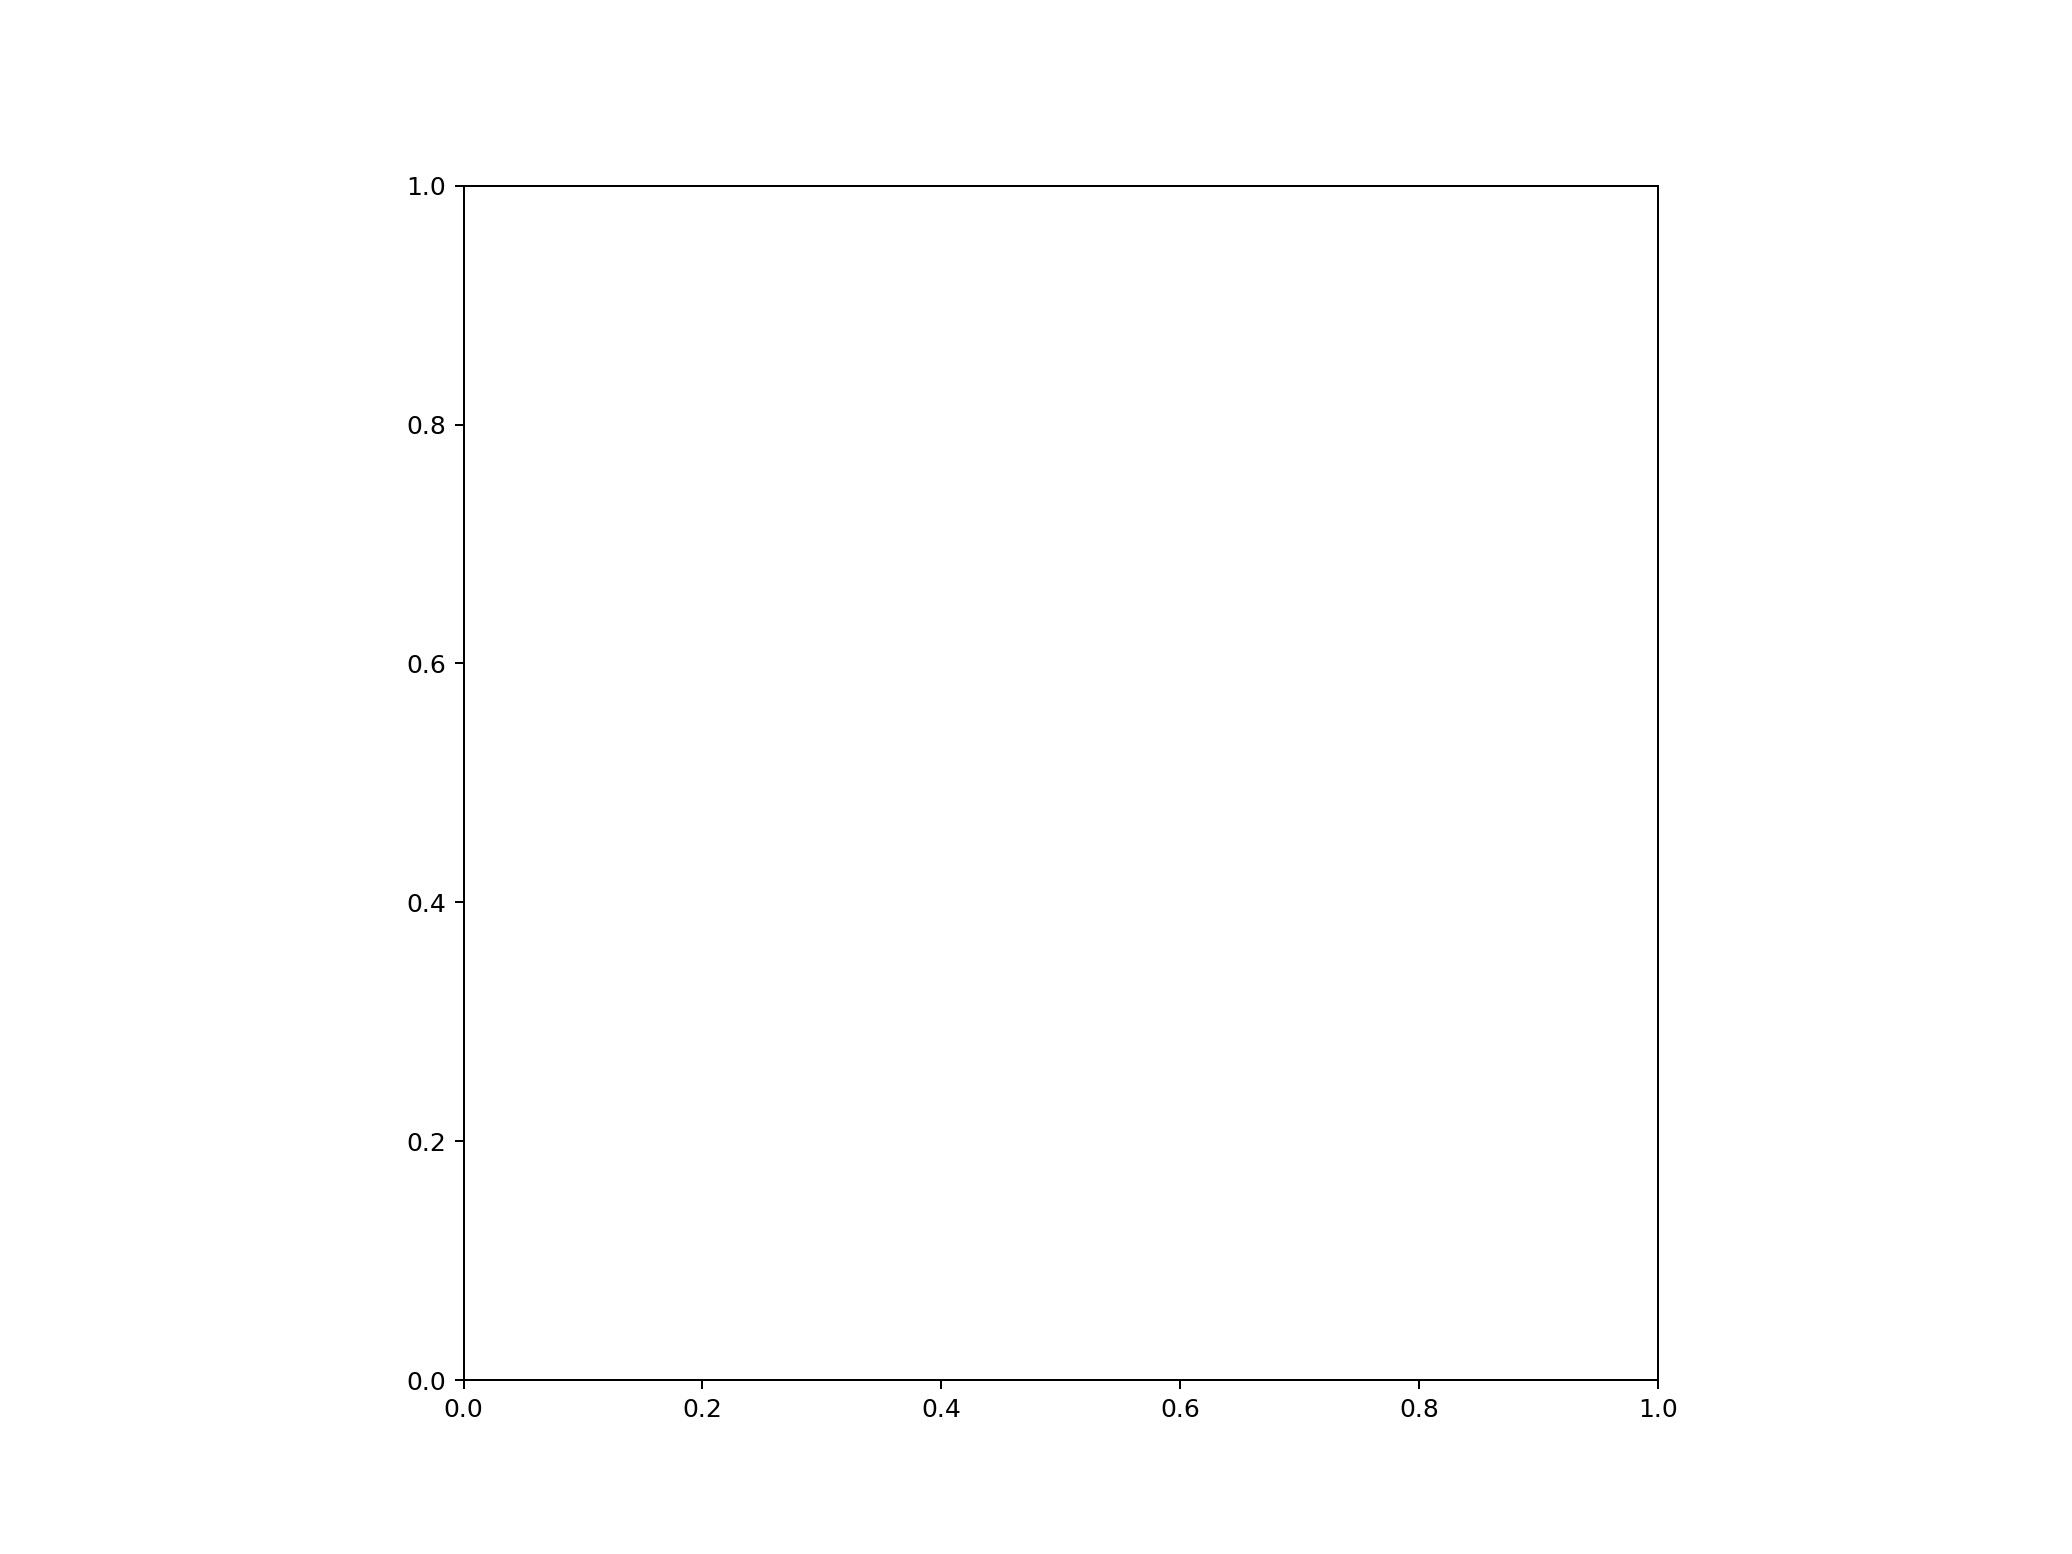

In [394]:
import matplotlib.pyplot as plt
%matplotlib notebook

# Creating a figure that contains a single
# set of axes. `plt.subplots()` returns
# the tuple: (Figure-instance, Axes-instance)
fig, ax = plt.subplots()

In [390]:
ls

HW_odds_and_ends.ipynb* resources/
